
# Complete Games vs Career Length of Pitchers

## Introduction
For this analysis, we will make the claim that pitchers have longer careers the less complete games they throw. This would correlate because there would be less damage and stress on their arms. We will analyze data to compare and see if we're correct.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
try:
    import seaborn as sns
except ImportError as e:
    %pip install seaborn
    import seaborn as sns
sns.set(style="whitegrid") 

pitching_data = pd.read_csv('./core/Pitching.csv') 

## Data Preparation


In [2]:
# total cgs
cg_yearly = pitching_data.groupby('yearID')['CG'].sum().reset_index()

# career length
career_length = pitching_data.groupby('playerID')['yearID'].agg(['min', 'max'])
career_length['career_length'] = career_length['max'] - career_length['min']

career_length['yearID'] = career_length['max']
career_length_average = career_length.groupby('yearID')['career_length'].mean().reset_index()

cg_career_length_analysis = pd.merge(cg_yearly, career_length_average, on='yearID')

First, we load the data and calculate the key metrics for our analysis: the number of complete games per year and the average career length of pitchers.

## Data Analysis and Trends


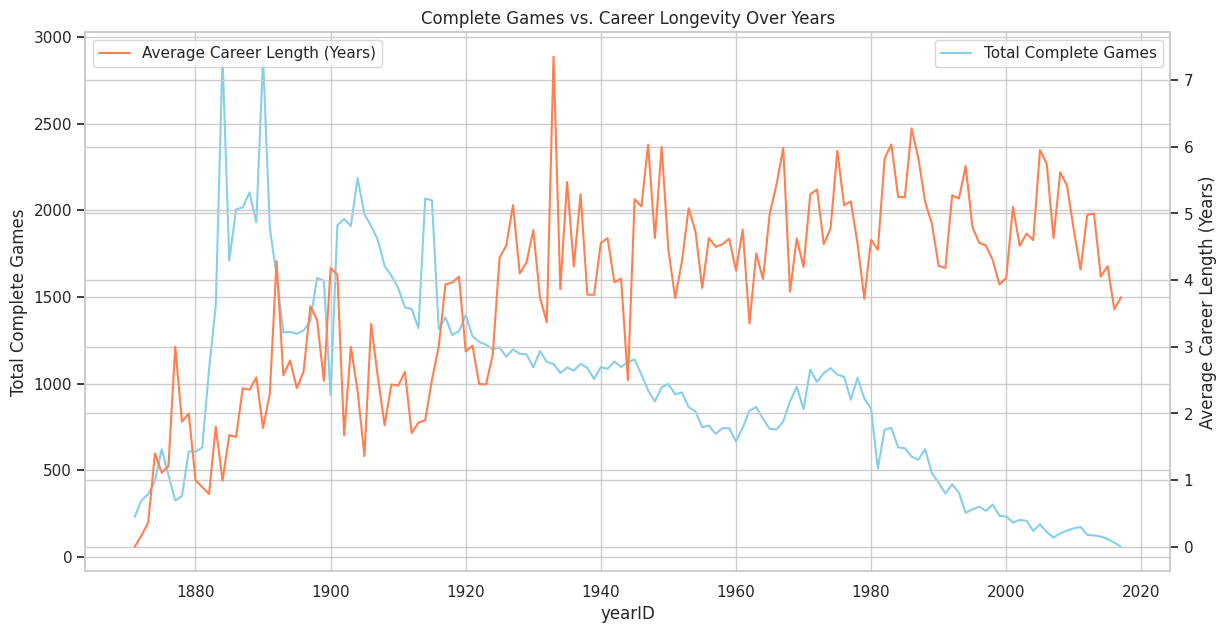

In [3]:
plt.figure(figsize=(14, 7))
ax = sns.lineplot(x='yearID', y='CG', data=cg_yearly, label='Total Complete Games', color='skyblue')
plt.ylabel('Total Complete Games')
ax2 = plt.twinx()
sns.lineplot(x='yearID', y='career_length', data=career_length_average, label='Average Career Length (Years)', color='coral', ax=ax2)
plt.ylabel('Average Career Length (Years)')
plt.title('Complete Games vs. Career Longevity Over Years')
plt.legend(loc='upper left')
plt.show()

With the metrics calculated, we will observe the trends over time to determine how the role and usage of pitchers have evolved.

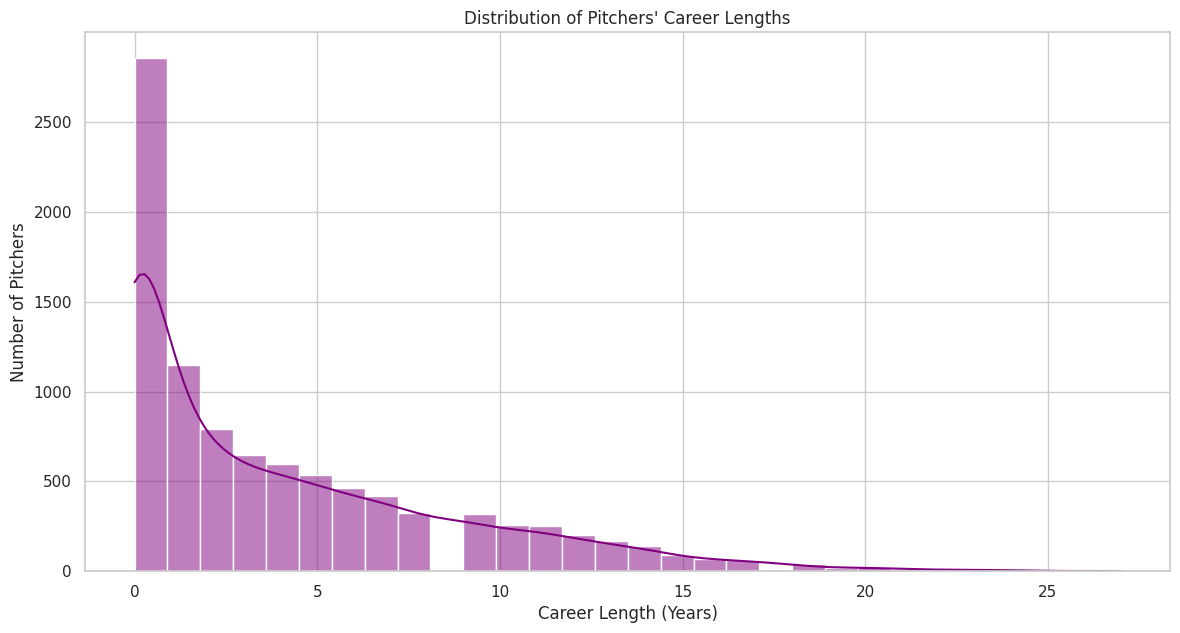

In [4]:
plt.figure(figsize=(14, 7))
sns.histplot(career_length['career_length'], bins=30, kde=True, color='purple')
plt.title("Distribution of Pitchers' Career Lengths")
plt.xlabel('Career Length (Years)')
plt.ylabel('Number of Pitchers')
plt.show()

## Analysis and Conclusion


The data shows a significant decrease in the number of complete games over the years, which aligns with the broader trend in baseball towards more specialized roles, such as relief and closing pitchers. This strategy may be a response to protect pitchers from injury and fatigue, which can result from the high physical demand of pitching complete games.

However, the data does not indicate a clear increase in career longevity despite the reduction in complete games. This could suggest that while pitchers are being protected more during games, other factors may be influencing career length. These different factors could include things like better sports medicine, better training programs, a more talented and larger player pool, or simply the natural physical limitations of pitching over many seasons.

Moreover, advances in sports medicine and surgery may mean that injuries that once ended careers can now be treated effectively, allowing pitchers to return to play. However, the stress of pitching, particularly at high velocities, still takes a toll on the body, and this may limit the potential for significantly longer careers.

It's important to recognize that the decline in complete games is a strategic choice that reflects more of a change in strategy in the game of baseball rather than a decline in pitcher's ability or longevity. 